# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Credenda Mirandantons

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Normal

## NO.1

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [98]:
# your code goes here!
no_1 = df.groupby('PaymentMethod').agg({'MonthlyCharges' : 'count'}).reset_index()
no_1

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522
2,Electronic check,2365
3,Mailed check,1612


<AxesSubplot:xlabel='PaymentMethod'>

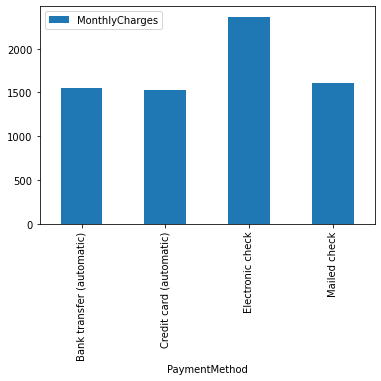

In [4]:
#grafik 
no_1.plot(x = 'PaymentMethod', y ='MonthlyCharges', kind = 'bar')

Jadi, dari plot di atas, kami menyimpulkan bahwa Payment Method terbesar pada Electronic chek sedangkan yang Payment Method terkecil pada Credit Card (automatic). Data tersebut didapati berdasarkan dari rata rata jumlah Monthly Charges dari customer. 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## NO.2

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [13]:
# read your data
no_2 = pd.read_csv('telco_customer.csv')

#mengelompokkan tenure dengan np.where
no_2['Tenure group'] = np.where(no_2['tenure'] <21, 'low_tenure',
                           np.where(no_2['tenure'] <= 40, 'medium_tenure', 'high_tenure'))

#Cek kolom tenure group
no_2['Tenure group'].value_counts()

low_tenure       2878
high_tenure      2757
medium_tenure    1408
Name: Tenure group, dtype: int64

In [101]:
#jumlah user berdasarkan Tenure group menggunakan agg
jumlah_user = no_2.groupby('Tenure group').agg({'customerID' : 'count'}).reset_index()
jumlah_user


,Tenure group,customerID
0,high_tenure,2757
1,low_tenure,2878
2,medium_tenure,1408


<AxesSubplot:xlabel='Tenure group'>

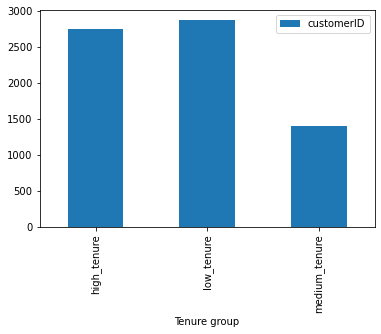

In [103]:
#grafik

jumlah_user.plot(x='Tenure group', y='customerID',
                 kind='bar')

Jadi, dari plot di atas, kami menyimpulkan bahwa cutomer terbanyak terdapat pada kelompok low_ternure, dimana artinya masa berlanggana customer umum nya akan berhenti saat < 21 bulan.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## NO.3

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [26]:
# read your data
no_3 = pd.read_csv('telco_customer.csv')

no_3['SeniorCitizen']=np.where(df['SeniorCitizen']==1, 'Senior', 'non-Senior')

group = no_3.groupby(['SeniorCitizen', 'PhoneService'])[['customerID']].nunique()
group

customerID
SeniorCitizen PhoneService            
Senior        No                   104
              Yes                 1038
non-Senior    No                   578
              Yes                 5323

In [28]:
group['Percentage_Customer']=round(group['customerID']*100/sum(group['customerID']), 2)

group = group.reset_index()
group

,SeniorCitizen,PhoneService,customerID,Percentage_Customer
0,Senior,No,104,1.48
1,Senior,Yes,1038,14.74
2,non-Senior,No,578,8.21
3,non-Senior,Yes,5323,75.58


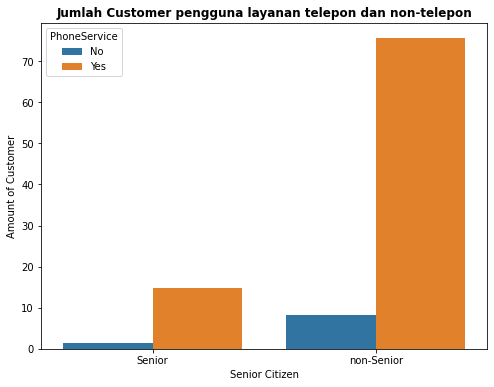

In [33]:
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x = 'SeniorCitizen', y='Percentage_Customer', data=group, ax=axes, hue='PhoneService')

axes.set_ylabel('Amount of Customer')
axes.set_xlabel('Senior Citizen')
axes.set_title('Jumlah Customer pengguna layanan telepon dan non-telepon', fontweight='bold')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## NO.4

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [36]:
# read your data
no_4 = pd.read_csv('telco_customer.csv')

#mengubah tipe data TotalCharges
no_4['TotalCharges'] = pd.to_numeric(no_4['TotalCharges'], errors='coerce')
no_4['TotalCharges'].dtypes

dtype('float64')

In [40]:
#cek kelengkapan value pd kolom
print('Setelah di convert, kolom tersebut memiliki', no_4['TotalCharges'].isnull().sum(), 'missing value')


Setelah di convert, kolom tersebut memiliki 11 missing value


In [41]:
#mengisi missing value dengan fillna dan median

no_4['TotalCharges'].fillna(no_4['TotalCharges'].mean(), inplace=True)

In [42]:
#chek kembali missing value pada kolom tersebut, apakah sudah terisi dengan kolom rata rata
no_4['TotalCharges'].isnull().sum()

0

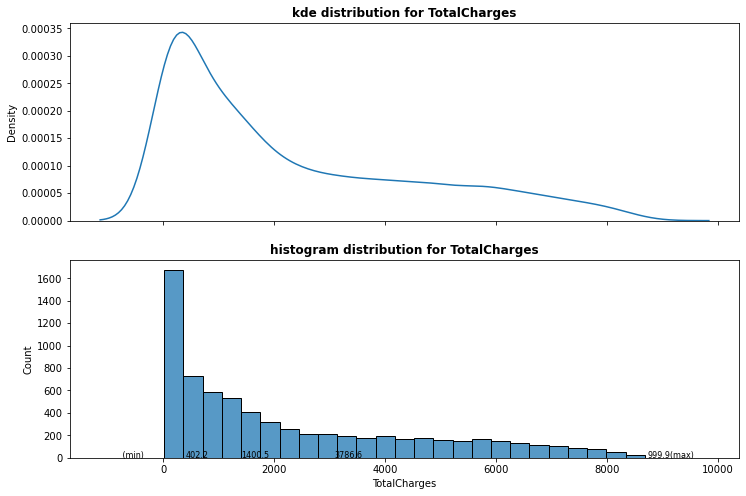

In [109]:
#plot grafik dari hasil grouping tersebut
fig, axes=plt.subplots(2,1,figsize=(12,8), sharex=True)

sns.kdeplot(x=no_4['TotalCharges'], ax=axes[0])
sns.histplot(x=no_4['TotalCharges'], ax=axes[1])


plt.text(x=no_4['TotalCharges'].median(), y=0, s=str(round(no_4['TotalCharges'].median(),1)), fontsize=8)
plt.text(x=no_4['TotalCharges'].quantile(0.75)-700, y=0, s=str(round(no_4['TotalCharges'].quantile(0.75),1)), fontsize=8)
plt.text(x=no_4['TotalCharges'].quantile(0.25), y=0, s=str(round(no_4['TotalCharges'].quantile(0.25),1)), fontsize=8)
plt.text(x=no_4['TotalCharges'].min()-800, y=0, s=str(df['TotalCharges'].min())+'(min)', fontsize=8)
plt.text(x=no_4['TotalCharges'].max()+50, y=0, s=str(df['TotalCharges'].max())+'(max)', fontsize=8)

list_title=['kde distribution for TotalCharges', 'histogram distribution for TotalCharges']
for i in range(len(list_title)):
    axes[i].set_title(list_title[i], fontweight='bold')
    


Jadi, dari plot di atas, dapat disimpulkan bahwa distribusi dari Total Charges mengalami penurunan

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## NO.5

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

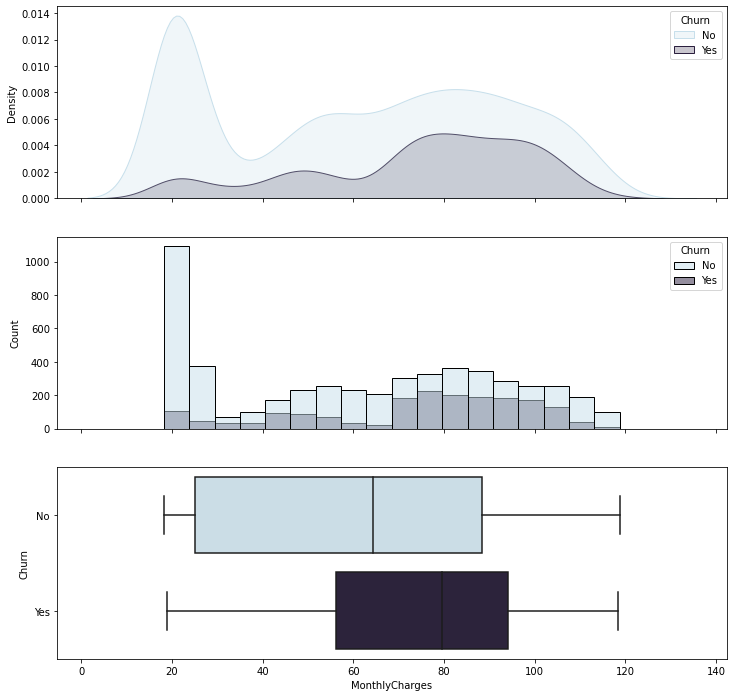

In [63]:
# your code goes here!
no_5 = pd.read_csv('telco_customer.csv')

fig, axes=plt.subplots(3,1,figsize=(12,12), sharex=True)
sns.kdeplot(data=no_5, hue='Churn', x='MonthlyCharges', fill=True, palette='ch:s=.25,rot=-.25', ax=axes[0])
sns.histplot(data=no_5, x='MonthlyCharges', hue='Churn', palette="ch:s=.25,rot=-.25", ax=axes[1])
sns.boxplot(x='MonthlyCharges', y='Churn', data=no_5, palette="ch:s=.25,rot=-.25", ax=axes[2])
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa customer yang memiliki Monthly Charges yang tinggi tidak cenderung churn

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## NO.6

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [67]:
# read your data
no_6 = pd.read_csv('telco_customer.csv')

#filter data cust yg berhenti atau churn = 'Yes'
a=no_6['Churn']=='Yes'

#group kolom Partner, Dependents
group6 = no_6[a].groupby(['Partner', 'Dependents'])[['customerID']].nunique()
group6

customerID
Partner Dependents            
No      No                1123
        Yes                 77
Yes     No                 420
        Yes                249

In [74]:
#membuat rasio presentasi dari total customer yg churn tsbt
group6['Percentage_Customer']=round(group6['customerID']*100/sum(group6['customerID']), 2)
group6 = group6.reset_index()
group6

,Partner,Dependents,customerID,Percentage_Customer
0,No,No,1123,60.09
1,No,Yes,77,4.12
2,Yes,No,420,22.47
3,Yes,Yes,249,13.32


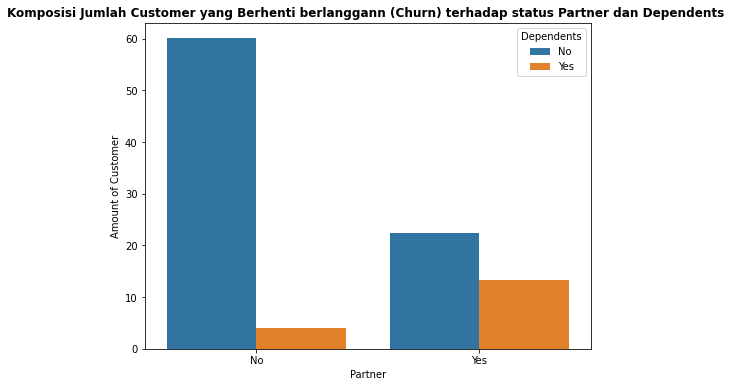

In [82]:
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x = 'Partner', y='Percentage_Customer', data=group6, ax=axes, hue='Dependents')

axes.set_ylabel('Amount of Customer')
axes.set_xlabel('Partner')
axes.set_title('Komposisi Jumlah Customer yang Berhenti berlanggann (Churn) terhadap status Partner dan Dependents ', fontweight='bold')
plt.show()

Jadi, dari plot di atas, dapat disimpulkan bahwa jumlah customer yang berhenti berlangganan yaitu customer yang tidak memiliki pasangan dan memiliki tanggungan. Namun dari data dapat diketahui pula bahwa customer yang tidak memiliki pasangan tapi memiliki tanggungan, customer tersebut cenderung tidak Behenti berlangganan.

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## NO.7

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [65]:
# read your data
no_7 = pd.read_csv('telco_customer.csv')

In [88]:
#metode PaymentMethod, CustomerID, dan Churn

#grouping berdasarkan PaymentMenthod
n=df['Churn'] == 'No'
group7_no = no_7[n].groupby(['Churn', 'PaymentMethod'])[['customerID']].nunique()
group7_no

customerID
Churn PaymentMethod                        
No    Bank transfer (automatic)        1286
      Credit card (automatic)          1290
      Electronic check                 1294
      Mailed check                     1304

In [89]:
#menghitung presentase jumlah customer yang tidak berhenti berlangganan di tiap2 paymentMethod
group7_no['Precentage_Customer'] = round(group7_no['customerID']*100/sum(group7_no['customerID']), 2)
group7_no

customerID  Precentage_Customer
Churn PaymentMethod                                             
No    Bank transfer (automatic)        1286                24.86
      Credit card (automatic)          1290                24.93
      Electronic check                 1294                25.01
      Mailed check                     1304                25.20

In [91]:
#kelompokkan customer berdasarkan payment method dan yang nilai churn == 'NO' untuk menghitung jumlah customer pada setiap kelompok metode pembayaran
x=no_7['Churn'] == 'Yes'
group7_yes = no_7[x].groupby(['Churn', 'PaymentMethod'])[['customerID']].nunique()
group7_yes

customerID
Churn PaymentMethod                        
Yes   Bank transfer (automatic)         258
      Credit card (automatic)           232
      Electronic check                 1071
      Mailed check                      308

In [92]:
#mengitung presentase jumlah customer yang berhenti berlanggganna pada setiap kelompok metode pembayaran
group7_yes['Precentage_Customer']=round(group7_yes['customerID']*100/sum(group7_yes['customerID']), 2)
group7_yes

customerID  Precentage_Customer
Churn PaymentMethod                                             
Yes   Bank transfer (automatic)         258                13.80
      Credit card (automatic)           232                12.41
      Electronic check                 1071                57.30
      Mailed check                      308                16.48

In [93]:
#append hasil kedua grouping di atas ke dalam dataframe no_7
append = group7_no.append(group7_yes)
append

customerID  Precentage_Customer
Churn PaymentMethod                                             
No    Bank transfer (automatic)        1286                24.86
      Credit card (automatic)          1290                24.93
      Electronic check                 1294                25.01
      Mailed check                     1304                25.20
Yes   Bank transfer (automatic)         258                13.80
      Credit card (automatic)           232                12.41
      Electronic check                 1071                57.30
      Mailed check                      308                16.48

In [95]:
#pivot tabel pertama untuk kolom index churn, kolom payment method, dan values customer ID

append_piv = append.pivot_table(columns='PaymentMethod', index='Churn', values='customerID')
append_piv

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


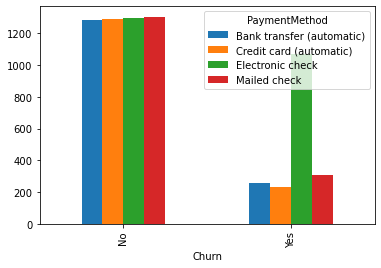

In [96]:
append_piv.plot(kind='bar');